<a href="https://colab.research.google.com/github/ellamonnard/2024_Geoinformatique_I/blob/main/surfaces_agricoles_utiles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pooch

In [2]:
import pooch

In [3]:
data_files = pooch.retrieve(
    url = 'https://files.swisscarto.ch/geoinf1/vd_dgav_surfaces_agricoles.zip',
    known_hash = None,
    processor = pooch.Unzip()
)

SHA256 hash of downloaded file: 0d866067c647f235d92499e669b8dfb4dfea18da3cfd99434a7e6176a9fba81f
Use this value as the 'known_hash' argument of 'pooch.retrieve' to ensure that the file hasn't changed if it is downloaded again in the future.
Unzipping contents of '/root/.cache/pooch/26d2db3ccf4efc592af4b57a09f55371-vd_dgav_surfaces_agricoles.zip' to '/root/.cache/pooch/26d2db3ccf4efc592af4b57a09f55371-vd_dgav_surfaces_agricoles.zip.unzip'


In [4]:
!pip install geopandas

In [5]:
import geopandas as gpd

In [13]:
surfaces_agricoles_path = [df for df in data_files if df.endswith('.gpkg')][0]
surfaces_agricoles = gpd.read_file(surfaces_agricoles_path, layer='agr_dgav_sau')

In [26]:
from google.colab import drive
drive.mount('/content/drive')

perimetre_evaluation_path = '/content/drive/My Drive/data/geoinf-proj-ze-4577.gpkg'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [29]:
perimetre_evaluation = gpd.read_file(perimetre_evaluation_path, layer = 'perimetre_evaluation')

In [32]:
surfaces_agricoles_filtered = gpd.clip(surfaces_agricoles, perimetre_evaluation)

In [33]:
surfaces_agricoles_utiles = gpd.overlay(surfaces_agricoles_filtered, perimetre_evaluation, how="intersection")

<Axes: >

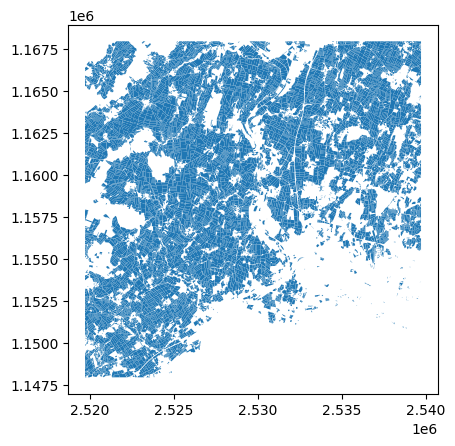

In [35]:
surfaces_agricoles_utiles.plot()

In [37]:
sau_utilisation_path = [df for df in data_files if df.endswith('.csv')][0]

In [40]:
sau_utilisation = pd.read_csv(sau_utilisation_path, sep=',')

In [41]:
import pandas as pd

In [42]:
 sau_utilisation.head()

,CODE_PROGR,CODE_UTILI,IDENT,N_ARBRES,PROGRAMME,UTILISATIO
0,Non,601,vd_406924,0,Aucun programme,Prairies artificielles (sans les pâturages)
1,Non,528,vd_49133,0,Aucun programme,Soja
2,Non,707,vd_209293,0,Aucun programme,Matières premières renouvelables pluriannuelle...
3,Non,617,vd_209482,0,Aucun programme,Pâturages extensifs
4,Non,901,vd_450638,0,Aucun programme,Forêt


In [47]:
surfaces_agricoles_utiles.head()

,ident,geometry
0,vd_208758,"POLYGON ((2522813.235 1147958.876, 2522804.375..."
1,vd_477661,"POLYGON ((2522196.382 1147956.543, 2522199.89 ..."
2,vd_104269,"MULTIPOLYGON (((2521335.285 1147962.373, 25218..."
3,vd_208757,"POLYGON ((2522800.514 1147931, 2522794.134 114..."
4,vd_53626,"POLYGON ((2522876.612 1147972.576, 2522867.737..."


In [53]:
sau_data = surfaces_agricoles_utiles.merge(sau_utilisation, left_on='ident', right_on='IDENT', how='left')

In [54]:
sau_data.head()

,ident,geometry,CODE_PROGR,CODE_UTILI,IDENT,N_ARBRES,PROGRAMME,UTILISATIO
0,vd_208758,"POLYGON ((2522813.235 1147958.876, 2522804.375...",Bio,613,vd_208758,25,Production bio,Autres prairies permanentes (sans les pâturages)
1,vd_477661,"POLYGON ((2522196.382 1147956.543, 2522199.89 ...",Non,513,vd_477661,0,Aucun programme,Blé d'automne (sans blé fourrager de la liste ...
2,vd_104269,"MULTIPOLYGON (((2521335.285 1147962.373, 25218...",Non,702,vd_104269,0,Aucun programme,Cultures fruitières (pommes)
3,vd_208757,"POLYGON ((2522800.514 1147931, 2522794.134 114...",Non,857,vd_208757,0,Aucun programme,"Haies, bosquets champêtres et berges boisées (..."
4,vd_53626,"POLYGON ((2522876.612 1147972.576, 2522867.737...",Non,611,vd_53626,0,Aucun programme,Prairies extensives (sans les pâturages)


In [55]:
print(surfaces_agricoles_utiles.crs)

EPSG:2056


In [61]:
sau_data['superficie_ha'] = sau_data.geometry.area / 10000

In [62]:
sau_data.head()

,ident,geometry,CODE_PROGR,CODE_UTILI,IDENT,N_ARBRES,PROGRAMME,UTILISATIO,superficie_ha
0,vd_208758,"POLYGON ((2522813.235 1147958.876, 2522804.375...",Bio,613,vd_208758,25,Production bio,Autres prairies permanentes (sans les pâturages),0.053118
1,vd_477661,"POLYGON ((2522196.382 1147956.543, 2522199.89 ...",Non,513,vd_477661,0,Aucun programme,Blé d'automne (sans blé fourrager de la liste ...,0.157715
2,vd_104269,"MULTIPOLYGON (((2521335.285 1147962.373, 25218...",Non,702,vd_104269,0,Aucun programme,Cultures fruitières (pommes),4.477459
3,vd_208757,"POLYGON ((2522800.514 1147931, 2522794.134 114...",Non,857,vd_208757,0,Aucun programme,"Haies, bosquets champêtres et berges boisées (...",0.002699
4,vd_53626,"POLYGON ((2522876.612 1147972.576, 2522867.737...",Non,611,vd_53626,0,Aucun programme,Prairies extensives (sans les pâturages),0.068385


In [70]:
summary = sau_data.groupby('UTILISATIO')['superficie_ha'].sum().reset_index()

In [71]:
print(summary)

                                            UTILISATIO  superficie_ha
0                                  Amidonnier, engrain      31.669899
1                                             Asperges       6.602903
2                                        Autre chanvre       0.397787
3     Autres cultures fruitières (kiwis, sureau, etc.)      36.345011
4    Autres cultures sous abri avec fondations perm...       0.125752
..                                                 ...            ...
103  Tournesol destiné à la fabrication d’huile com...     705.052332
104                                          Triticale     173.875651
105                                         Truffières       5.036436
106                                             Vignes     249.777159
107  avec des céréales ou de la caméline, au moins ...      12.347888

[108 rows x 2 columns]


In [72]:
summary.to_csv('resume_surfaces_agricoles.csv', index=False)

In [73]:
del sau_data['IDENT']

In [74]:
surfaces_agricoles_utilisation_path = '/content/drive/My Drive/data/surfaces_agricoles_utilisation.gpkg'

In [75]:
sau_data.to_file(surfaces_agricoles_utilisation_path, layer='surfaces_agricoles_utilisation', driver='GPKG')

In [77]:
from google.colab import files

files.download(surfaces_agricoles_utilisation_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [79]:
from google.colab import files

files.download('resume_surfaces_agricoles.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>